## First and Second Assignment



First

*   Generate an Interpolation Function;
*   Interpolate a gaussian function and compare the error to real Gaussian data;
*   Find the cumulative of the interpolated function;

Second

*   Generate a sampler using linear interpolation in the cumulative points;


In [ ]:
import numpy as np              #importing the libraries
import scipy as scp
import matplotlib.pyplot as plt
import scipy.integrate as it

# Part 1: Interpolation

First, let's define the function $\hbox{gaussian}(x,\mu,\sigma)$, which for each $x_{i}$ in a linspace $x$ associates a number by the equation

$$ \hbox{gaussian}(x_{i}) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}}\, .$$



In [ ]:
def gaussian(x,μ,σ): #gaussian function
  return 1/(np.sqrt(2*np.pi*σ**2))*np.exp(-((x-μ)**2)/(2*σ**2))

Let's se an example:

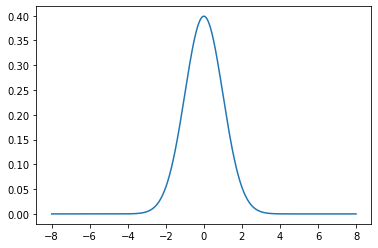

In [ ]:
x = np.linspace(-8,8,1000) # domain of the gaussian
y = gaussian(x,0,1)        # test of a gaussian function for μ=0, σ=0.1
plt.plot(x,y)

In the cells above, we associate a linspace $\hbox{gaussian}(x,\mu,\sigma)$ to a $x$ linspace. Now, let's suppose we got another linspace $z$, and that we would like to calculate the values of $y$ on the curve $\hbox{gaussian}(x,\mu,\sigma)$, already calculated. We can do that by defining an interpolation function, $\hbox{interpolate}(z,y,x)$.

The idea is as follows: suppose that, for each $x_{i}$,$x_{i+1} \in x$, the function $y(x)$ varies slowly. Then, we can approximate the function for a line segment that passes through $(x_{i},y(x_{i}))$ and $(x_{i+1},y(x_{i+1}))$. Defining $y_{i}=y(x_{i})$, the coefficients $a_{i}$ and $b_{i}$ of such line can be calculate explicitly by

$$ a_{i} = \frac{(y_{i+1}-y_{i})}{(x_{i+1}-x_{i})}\, ,$$
$$ b_{i} = y_{i}-a_{i}x_{i}\, ,$$

where we used the line equation

$$y(x) = ax+b\, .$$

The same procedure can be repeated for each $x_{i} \in x$, which can be implemented using a **for** command.

In [ ]:
def interpolate(z,y,x): 
  p=[]              # Definition of the interpolation function. Here, z, y, x are linspaces, with z being the domaing of interpolation, and y(x) the curve that we want to interpolate.        
  for j in range(np.size(x)-1):  
    a = (y[j+1]-y[j])/(x[j+1]-x[j]) 
    b = y[j]-a*x[j] 
    p.append([a,b]) # The function is defined in two parts. The first calculates the coefficients of the lines that approximate the function in each interval.
    
  inter = []        # This second part uses the coefficients to project the values of z over the curve y(x) that we want to interpolate
  for i in range(np.size(z)):   
    for j in range(np.size(x)-1):
      if x[j]<z[i] and z[i]<x[j+1]:
        q = (p[j][0])*z[i]+(p[j][1])
        inter.append(q)
  return inter

Let's do an example. We shall interpolate the function $y(x)=\hbox{gauss}(x,0,1)$ (defined above) over the interval $(-3,3)$ with $150$ points. Note that the precision of the interpolation depends on the number of points taken over the interpolation interval.

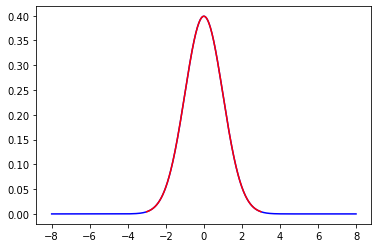

In [ ]:
z = np.linspace(-3,3,150)   # This the new interval that we want to interpolate the gaussian
q = interpolate(z,y,x)      # Here x is the domain of the gaussian y(x), defined above.

plt.plot(x,y, color='blue') #Original gaussian, in blue
plt.plot(z,q, color='red')  # Plot of the interpolated gaussian and the original gaussian

The same can be done for other curves. Below is an example of interpolation of a $\hbox{cos}(x)$ function. Note that the domain of interpolation should be contained in the domain of the function.

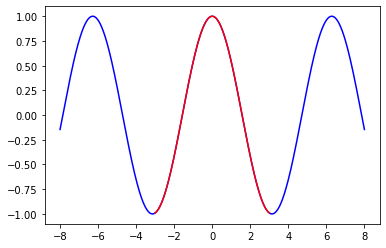

In [ ]:
g = np.linspace(-3,3,100)           # Interpolation interval
h = interpolate(g,np.cos(x),x) 

plt.plot(x,np.cos(x), color='blue') # cos(x) function, in blue
plt.plot(g,h, color='red')          # Interpolated cos(x) function, in red

# Part 2: Sampler of a gaussian distribution

To creat a sampler of a gaussian distribution, we will use the inverse cumulative distribution technique. First, we will create the $\hbox{integral}(z,y,x)$ function, which integrates the function $y(x)$ in the interval $z$. 

Suppose the interval is $z = (a,b)$, then the integral of $y(x)$ is defined as a Riemann sum

$$\int_{a}^{b}y(x)dx = \lim_{n\rightarrow \infty } \sum_{i=0}^{n}y_{i}\Delta x_{i} \, , $$

where

$$ \Delta x_{i} = \frac{(b-a)}{n}\ .$$

The sum can be done using a **for** command for each $i$. To implement this definition of integral, we shall first interpolate the function $y(x)$ over the interval $z$, and then make the Riemann sum.

In [ ]:
def integral(z,y,x):
  p = interpolate(z,y,x) # Here we interpolate y(x) over z
  pc = np.size(p)
  d = (z[pc-1]-z[0])/pc  # Here, z[0] is the first element of the interval z, which takes the role of a above. 
  area = []              # Similarly, z[pc-1] takes the role of b
  q = 0
  for i in range(pc):    # In this FOR command, we sum over each element of z and add the values to a list "area"
    q += p[i]*d
    area.append(q)
  return area            # The function returns a linspace which stores the value of the integral at each point

Below is the integration an exponencial function $e^x$ over the interval $(0,8)$.

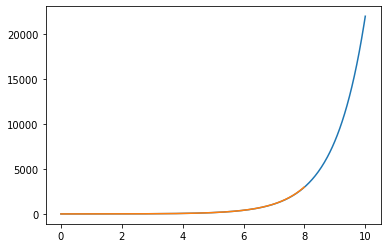

In [ ]:
s1 = np.linspace(0,8,1000)       # Integration interval of the function s3(s2)
s2 = np.linspace(0,10,500)       # Domain of the function to be integrated
s3 = np.exp(s2)                  # Definition of the  exponential
s4 = integral(s1,s3,s2)          # Aplication of the integral function

plt.plot(s2,s3)                  # Plot of the exponential
plt.plot(s1[0:np.size(s1)-1],s4) # Plot of the integral. Since the original function was exponential, they coincide

Now we are in position to define the cumulative distribution of the gaussian function. It's name is error function $erf(x)$. Explicitly:

$$\hbox{erf}(z,\mu,\sigma) = \int_{-\infty}^{z}\hbox{gauss}(x,\mu,\sigma)dx \, .$$

Of course, we cannot integrate numericaly from $-\infty$, so we take a value for each the value of the gaussian is very small. In the cell below, we will define the error function for an arbitrary interval, but in practice we will demand this condition on its domain.

In [ ]:
def erf(z,μ,σ):                         # Definition of the error function
  return integral(z,gauss(2*z,μ,σ),2*z) # Note the value 2 in the gaussian and its domain. We do this to ensure that the integration domain is contained in the domain of the gaussian, and also to ensure that it's value is close to zero

Let's do an example of aplication of the $\hbox{erf}(x,\mu,\sigma)$ function.

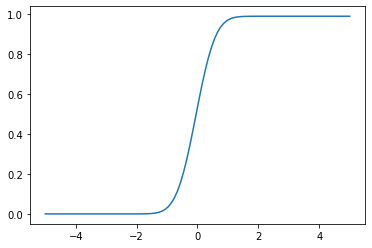

In [ ]:
w= np.linspace(-5,5,100) # Domain of the error function. Note that gauss(-5,0,0.5) is very close to 0
error = erf(w,0,0.5)     # Application of the erf(z, μ, σ) function
plt.plot(w,erf(w,0,0.5)) 

Now it's time to create the sampler. The idea is the following:

1. We begin with a list of random numbers between $0$ and $1$ generated by an uniform distribution;

2. The image of $\hbox{erf}(z,\mu,\sigma)$ is precisely $(0,1)$. We then invert the error 
associating for each value in $(0,1)$ to a point in the domain the error function. This can be done by reverse interpolation, which shall become clearer in the code;

3. Now we have another set of random numbers, but with an interesting property: they now follow a gaussian distribution. We will show this by ploting its histogram and comparing it to the generated by a Numpy gaussian distribution;

First, let's create uniform random number generator. In the cell below, we create the function **samples(n)**, which generates a set of $n$ random numbers between $0$ and $1$ using the Numpy choices command. 

In [ ]:
def sample(n):                  # Uniform random number generator between 0 and 1
  rand = np.linspace(0,1,1000)  # Interval (0,1). We take a large number o numbers to guarantee that those are random
  sample = []
  for i in range(n):
    u = np.random.choice(rand)
    sample.append(u)
  return sample

print(sample(10))               # Example of a sample of 10 random numbers between 0 and 1

[0.98998998998999, 0.9429429429429429, 0.05105105105105105, 0.8808808808808809, 0.5575575575575575, 0.04804804804804805, 0.21021021021021022, 0.16716716716716717, 0.934934934934935, 0.8638638638638638]


Our next step is to invert the error function. First, let's do this graphically, we is in the cell below. Note that the domain of the inverse is $(0,1)$.

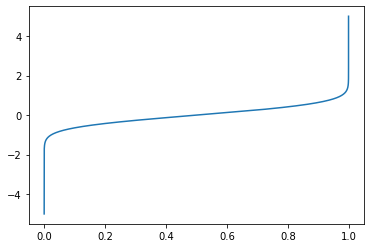

In [ ]:
w= np.linspace(-5,5,1000) 
error = erf(w,0,0.5)
plt.plot(error,w)         # Here we plot w(error(w)), in reverse order

To implement the inversion, we will first create a sample of $10000$ random numbers. Then we will interpolate $w(\hbox{erf}(w,\mu,\sigma))$ over our random numbers. 

The final step is to plot a histogram of such interpolation. The result is a sample of random numbers with gaussian data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


(array([  77.,  454., 1386., 2461., 2765., 1788.,  753.,  169.,   16.,
           9.]),
 array([-1.6222516 , -1.24824151, -0.87423141, -0.50022132, -0.12621122,
         0.24779887,  0.62180897,  0.99581906,  1.36982916,  1.74383925,
         2.11784935]),
 <a list of 10 Patch objects>)

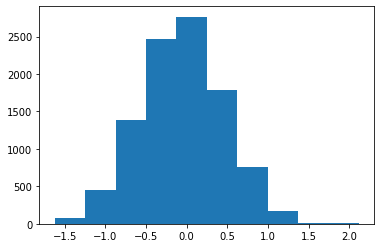

In [ ]:
oursample = sample(10000)               # Definition of our sample of 10000 random numbers
dist = interpolate(oursample,w,error)   # Interpolation of our sample over w(erf(w, μ, σ)))

plt.hist(dist)                          # Plot of the histogram                   

Now, let's compare our result with a sample created from a gaussian distribution using the Numpy library:

Text(0.5, 1.0, 'Numpy gaussian sample')

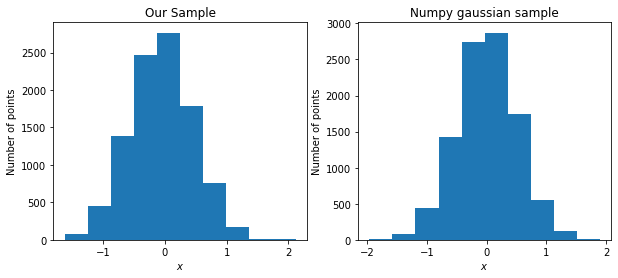

In [ ]:
normal = []                              # This is our gaussian sample
for i in range(m):
  normal.append(np.random.normal(0,0.5)) # For each i, we take a random number following a gaussian distribution

fig, ax=plt.subplots(1,2,figsize=(10,4))
ax[0].hist(dist)                         # Plot of our gaussian sampler
ax[1].hist(normal)                       # Plot of the Numpy gaussian sampler


ax[0].set_xlabel('$x$')                  # The following lines set the legend of the histograms
ax[0].set_ylabel('Number of points')                  
ax[0].set_title('Our Sample')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('Number of points')  
ax[1].set_title('Numpy gaussian sample')